# Riss 논문 요약정보 크롤링

In [1]:
# 필요한 라이브러리 불러오기

import requests as req
from bs4 import BeautifulSoup as bs

import pandas as pd

## RISS에서 크롤링하고자 하는 검색어 입력 -> URL

page = int(input("페이지 수 : "))
search = input("검색어 : ")

url = "https://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query={}&queryText=&iStartCount={}&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale=10&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery={}&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword={}&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn="

## 새로운 데이터프레임 만들기

df_info = pd.DataFrame(columns = ['저자', '국문 제목', '수록지', '국문 요약', '링크'])

authors = []
k_titles = []
books = []
abstracts = []

links = []

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'}

for i in range(page) :
    page_num = i * 10
    # print(page_num)
    
    res = req.get(url.format(search, page_num, search, search), headers = headers)
    html = bs(res.text, 'html.parser')
    items = html.findAll('div', {'class' : 'cont'})

    
    for item in items :
        # print(item)
        r_items = item.findAll('p', {'class' : 'title'})
        
        try : 
            abstract = item.find("p", {'class' : 'preAbstract'}).text.strip()
            abstracts.append(abstract)
        except Exception as ex :
            abstracts.append("")
        # print(abstract)
        # print("************")
    
        for detail in r_items :
            links.append(detail.find("a")["href"])
            k_titles.append(detail.find("a").text)
        
            
    for item in items :
        r_items = item.findAll('p', {'class' : 'etc'})
        for detail in r_items :
            authors.append(item.find("span", {'class' : 'writer'}).text)
            books.append(item.find("span", {'class' : 'assigned'}).text)
          
len(links), len(authors), len(k_titles), len(books), len(abstracts)

df_info['저자'] = authors
df_info['국문 제목'] = k_titles
df_info['수록지'] = books
df_info['국문 요약'] = abstracts
df_info['링크'] = links

df_info


페이지 수 : 50
검색어 : 외국인 노동자 복지


,저자,국문 제목,수록지,국문 요약,링크
0,이만식,외국인 노동자 문제에 대한 사회복지적 개입 방안에 관한 연구,침례신학대학교 출판부,,/search/detail/DetailView.do?p_mat_type=1a0202...
1,전병주(Byeong-Joo Jeon),외국인 노동자의 사회적 배제가 심리적 복지감에 미치는 영향,한국콘텐츠학회,본 연구는 외국인 노동자들이 지각하는 사회적 배제가 그들의 심리적 복지감에 미치는 ...,/search/detail/DetailView.do?p_mat_type=1a0202...
2,"김현숙 ( Hyun Suk Kim ),최송식 ( Song Sik Choi ),김희재...",외국인 노동자 건강정책의 쟁점과 정책 제언,한국사회복지정책학회,이 연구에서는 외국인 노동자의 건강문제 개선을 위한 건강정책을 논의했다. 이를 위해...,/search/detail/DetailView.do?p_mat_type=1a0202...
3,이연심,국내 외국인 노동자의 산업재해보상에 관한 연구(1996. 2),연세대학교 사회복지연구소,,/search/detail/DetailView.do?p_mat_type=1a0202...
4,이연심,국내 외국인 노동자의 산업재해보상에 관한 연구 ; 상담사례 내용을 중심으로(1996...,연세대학교 사회복지연구소,,/search/detail/DetailView.do?p_mat_type=1a0202...
...,...,...,...,...,...
107,허춘중,21세기 빈곤문제에 대한 기독교의 대응 방안,한국빈곤문제연구소,,/search/detail/DetailView.do?p_mat_type=1a0202...
108,"신기원(Shin Ki Won),박상규(Park Sang Kyu)",상생 · 발전을 위한 다문화정책의 과제,한국갈등관리학회,"우리 사회는 통계적으로는 다문화사회에 진입하였지만, 사회적 규범과 의식 그리고 문화...",/search/detail/DetailView.do?p_mat_type=1a0202...
109,"류시조(Ryu, Si-Jo)",화사회와 자유권적 기본권,한국헌법학회,다문화사회에 있어서 자유권적 기본권의 문제는 특히 사회문화적 약자라고 할 수 있는 ...,/search/detail/DetailView.do?p_mat_type=1a0202...
110,"양인숙,민무숙",여성결혼이민자의 경제활동 실태와 정책과제,한국여성정책연구원(구 한국여성개발원),Ⅰ. 서론\r\n최근 우리 사회에서 나타나고 있는 주목할 만한 인구학적 변화는 국제...,/search/detail/DetailView.do?p_mat_type=1a0202...


## 워드 클라우드 제작

In [2]:
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [4]:
with open('paper.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c

Counter({'연구': 123,
         '외국인': 339,
         '노동자': 255,
         '지각': 2,
         '사회': 379,
         '배제': 24,
         '심리': 6,
         '복지': 114,
         '영향': 56,
         '위해': 55,
         '서울': 6,
         '경기': 16,
         '지역': 67,
         '거주': 30,
         '생산': 21,
         '단순': 4,
         '기능': 5,
         '업무': 7,
         '종사': 12,
         '대상': 56,
         '결과': 61,
         '보통': 4,
         '수준': 66,
         '조금': 2,
         '반면': 25,
         '체류': 31,
         '기간': 17,
         '건강': 25,
         '상태': 12,
         '한국어': 9,
         '능력': 12,
         '직장': 6,
         '근무': 12,
         '집단': 42,
         '별로': 15,
         '통계': 31,
         '의미': 15,
         '차이': 26,
         '자격': 5,
         '수입': 20,
         '또한': 47,
         '하위': 3,
         '요인': 34,
         '소비': 18,
         '활동': 38,
         '유의': 7,
         '미하': 3,
         '문제': 81,
         '개선': 31,
         '정책': 244,
         '논의': 25,
         '보험': 32,
         '가입': 16

In [5]:
#한글 폰트 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

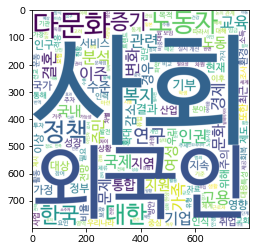

In [6]:
#한글로 워드클라우드 시각화
wc = WordCloud(font_path='NanumBarunGothic', background_color='white', width=400, height=400, scale=2.0, max_font_size=250)
cloud = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(cloud)